In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import random
import scipy.stats
from plotly.tools import FigureFactory as FF
%matplotlib inline

In [33]:
class Open_csv:
    
    def __init__(self):
        pass
    
    def open(self,path_to_file):
        data = np.asarray(pd.read_csv(path_to_file, delimiter=",").values)
        return data

In [34]:
open_csv = Open_csv()
data = open_csv.open("data/BNP.PA.csv")
# open high low close

In [97]:
def f_1(vector):
    return (vector[2]-vector[3])/(vector[1]+vector[4]) # (high-low)/(open+close)

In [80]:
# garman klass
def f_1(vector):
    # vector[1] = open ; vector[2] = high ; vector[3] = low ; vector[4] = close
    return 12*(np.log(vector[2]/vector[3])**2)-(2*np.log(2)-1)*(np.log(vector[4]/vector[1])**2)

In [52]:
# parkinson
def f_1(vector):
    # vector[1] = open ; vector[2] = high ; vector[3] = low ; vector[4] = close
    return np.log(vector[2]/vector[3])

In [98]:
def compute_function_returns(function,data):
    returns = []
    for i in range(len(data)):
        returns.append(function(data[i]))
    return np.asarray(returns)

In [99]:
returns = compute_function_returns(function=f_1,
                                  data= data)

In [100]:
stock_list = ["AC.PA", "AI.PA", "AIR.PA", "ATO.PA", "BNP.PA", "EN.PA", "CAP.PA", "CA.PA", "ACA.PA", 
          "BN.PA", "ENGI.PA", "EI.PA", "KER.PA", "OR.PA", "LHN.PA", "LR.PA", "MC.PA", "ML.PA", "ORA.PA",
          "UG.PA", "SGO.PA", "SAN.PA", "SU.PA", "GLE.PA", "SW.PA", "FP.PA", "FR.PA", "VIE.PA", "DG.PA", "VIV.PA"]

In [101]:
stocks_returns = []
for stock_name in stock_list:
    stocks_returns.append(compute_function_returns(function=f_1,
                                                 data = open_csv.open("data/"+stock_name+".csv")))

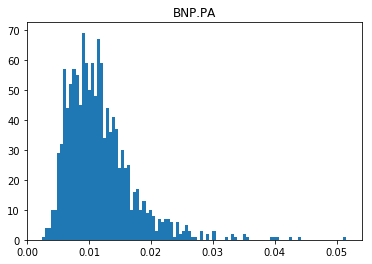

In [102]:
stock_name = "BNP.PA"
plt.hist(stocks_returns[stock_list.index(stock_name)],bins=100)
plt.title(stock_list[stock_list.index(stock_name)])
plt.show()

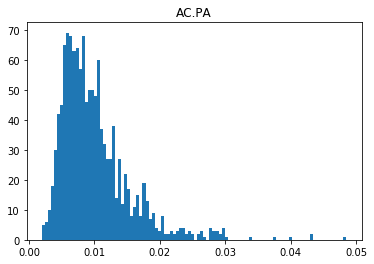

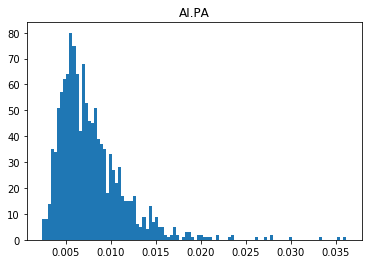

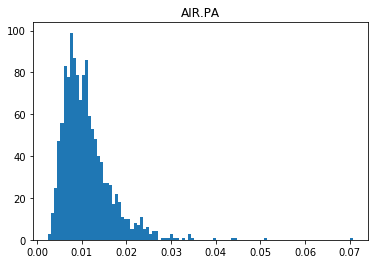

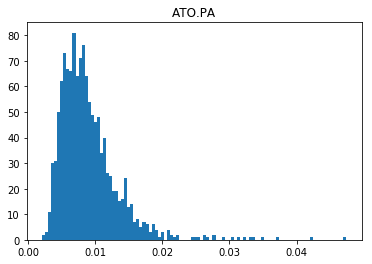

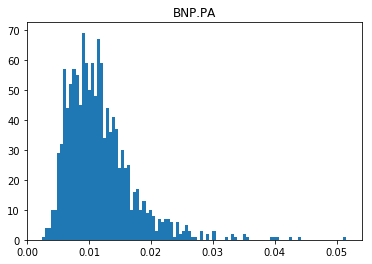

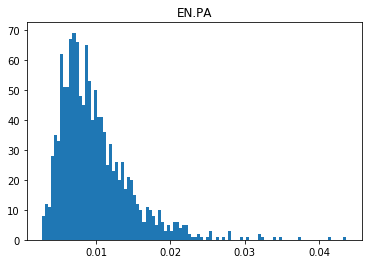

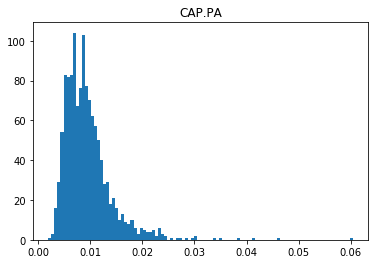

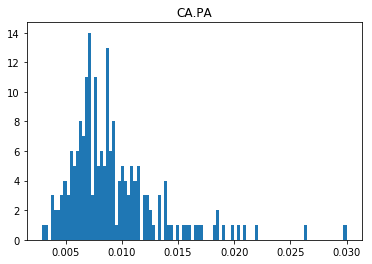

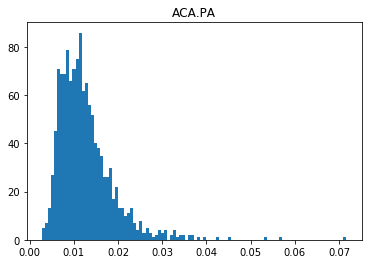

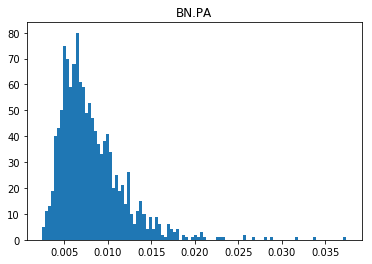

In [103]:
n_plot = 10
for i in range(n_plot):
    #index = random.randint(0,len(stocks_returns)-1)
    index = i
    plt.hist(stocks_returns[index],bins=100)
    plt.title(stock_list[index])
    plt.show()

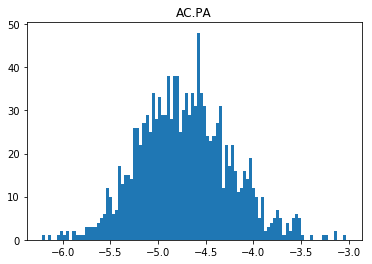

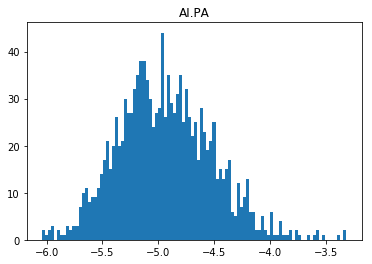

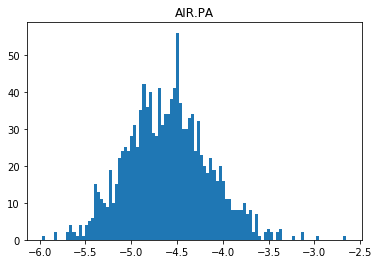

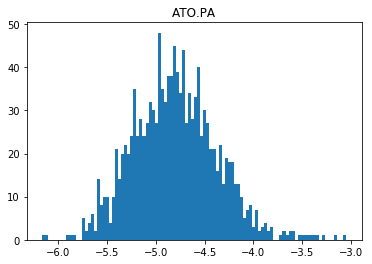

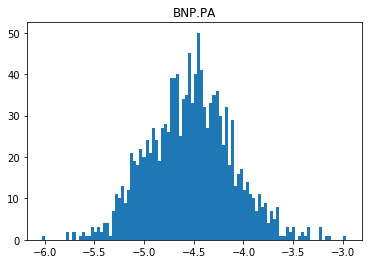

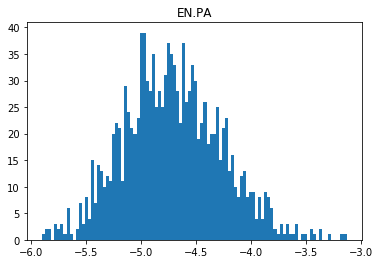

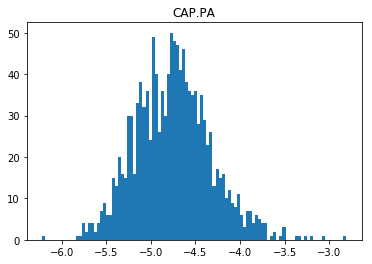

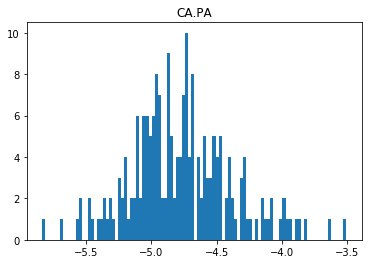

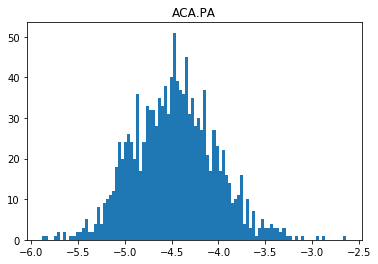

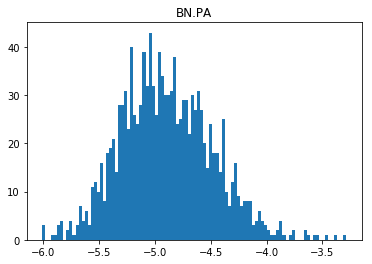

In [104]:
n_plot = 10
for i in range(n_plot):
    #index = random.randint(0,len(stocks_returns)-1)
    index = i
    plt.hist(np.log(stocks_returns[index]),bins=100)
    plt.title(stock_list[index])
    plt.show()

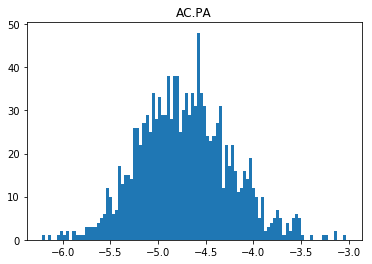

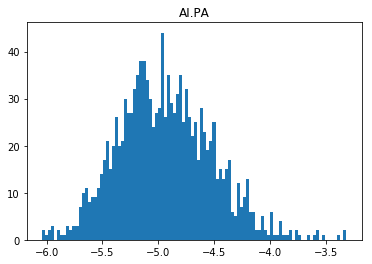

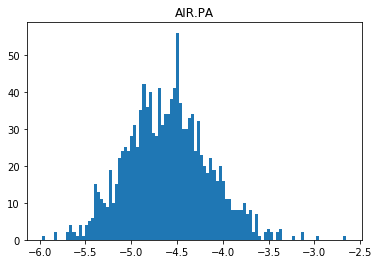

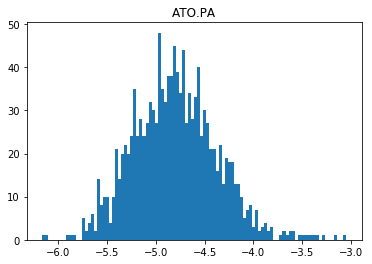

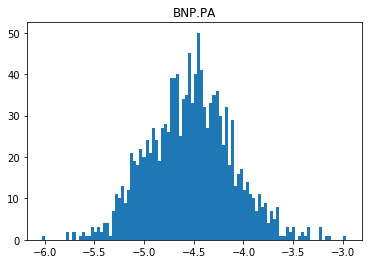

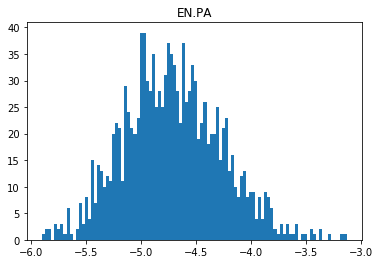

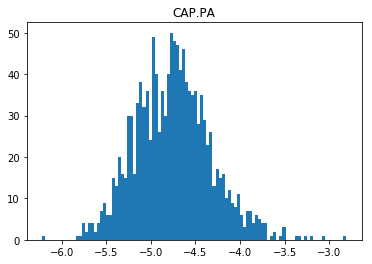

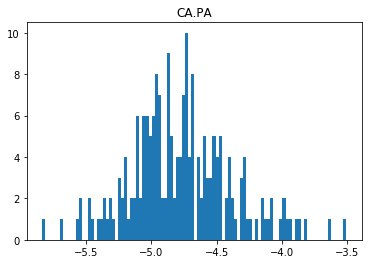

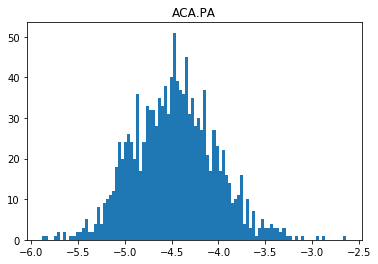

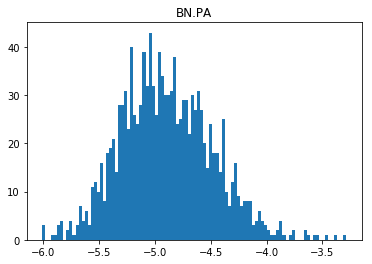

In [105]:
n_plot = 10
for i in range(n_plot):
    #index = random.randint(0,len(stocks_returns)-1)
    index = i
    plt.hist(np.log(stocks_returns[index]),bins=100)
    plt.title(stock_list[index])
    plt.show()

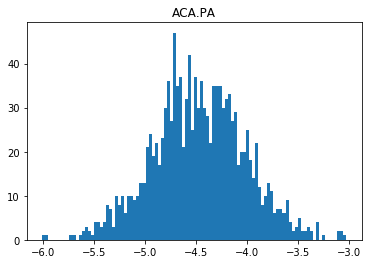

In [106]:
    index = 8
    plt.hist(np.random.normal(np.mean(np.log(stocks_returns[index])),np.std(np.log(stocks_returns[index])),1300),bins=100)
    plt.title(stock_list[index])
    plt.show()

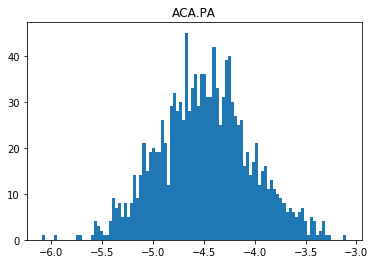

In [107]:
    index = 8
    plt.hist(np.random.normal(np.mean(np.log(stocks_returns[index])),np.std(np.log(stocks_returns[index])),1300),bins=100)
    plt.title(stock_list[index])
    plt.show()

In [108]:
import plotly.plotly as py

index = 8
shapiro_results = scipy.stats.shapiro(np.log(stocks_returns[index]))

matrix_sw = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['Sample Data', len(np.log(stocks_returns[index])) - 1, shapiro_results[0], shapiro_results[1]]
]

#shapiro_table = FF.create_table(matrix_sw, index=True)
#py.iplot(shapiro_table, filename='shapiro-table')

In [109]:
print(matrix_sw)

[['', 'DF', 'Test Statistic', 'p-value'], ['Sample Data', 1277, 0.9969492554664612, 0.014055458828806877]]


In [110]:
nx = 0
ny = 100

In [111]:
n_stock = 4
data_for_dataframe = []
columns_for_dataframe = []
for i in range(n_stock):
    index = random.randint(0,len(stocks_returns)-1)
    print(index)
    data_for_dataframe.append(stocks_returns[index][nx:ny])
    columns_for_dataframe.append(stock_list[index])
data_for_dataframe = np.asarray(data_for_dataframe)
columns_for_dataframe = np.asarray(columns_for_dataframe)

29
3
18
13


In [112]:
dataFrame = pd.DataFrame(data_for_dataframe,columns_for_dataframe).transpose()

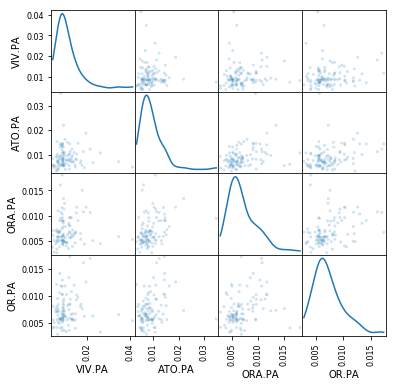

In [113]:
# A scatterplot matrix allows us to visualize:
#   * on the diagonal, the density estimation for each of the features
#   * on each of the off-diagonal plots, a scatterplot between two of the features. 
#     Each dot represents a sample.

from pandas.plotting import scatter_matrix
scatter_matrix(dataFrame, alpha=0.2,
               figsize=(6, 6), diagonal='kde');

In [112]:
dataFrame.corr()

,UG.PA,AIR.PA,FP.PA,ACA.PA
UG.PA,1.000000,0.423645,0.522521,0.48653
AIR.PA,0.423645,1.000000,0.556070,0.51122
FP.PA,0.522521,0.556070,1.000000,0.57003
ACA.PA,0.486530,0.511220,0.570030,1.00000
